In [ ]:
 !pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.2 MB/s eta 0:00:00


VisuShrink and BayesShrink using Inbuilt Functions

Enter the full path of the image: /content/story_lena_lenna_1.jpg
Estimated Gaussian noise standard deviation = 0.11306068587614312


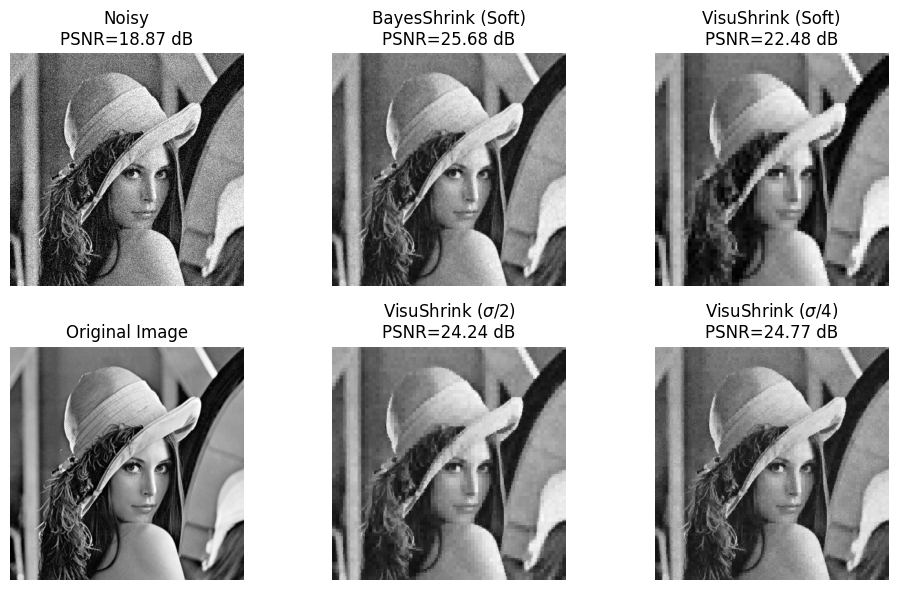

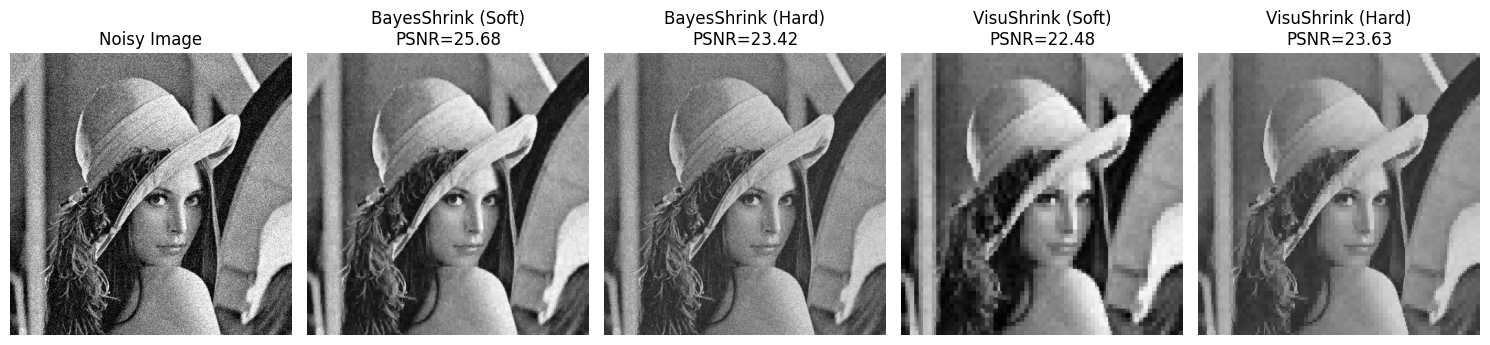

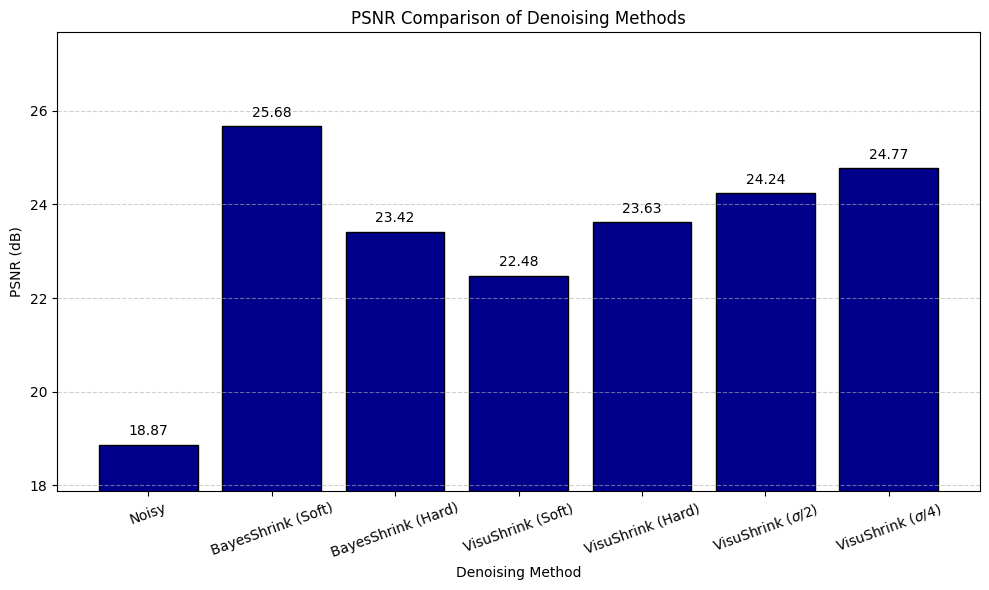

In [ ]:
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import numpy as np

# Load grayscale image
image_path = input("Enter the full path of the image: ")
original = img_as_float(io.imread(image_path, as_gray=True))  # Ensure grayscale

# Add Gaussian noise
sigma = 0.12
noisy = random_noise(original, var=sigma**2)

# Estimate noise standard deviation
sigma_est = estimate_sigma(noisy, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

# --- Denoising methods ---

# BayesShrink (Soft) – already exists
im_bayess = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='BayesShrink',
    mode='soft',
    rescale_sigma=True,
)

# BayesShrink (Hard)
im_bayesh = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='BayesShrink',
    mode='hard',
    rescale_sigma=True,
)

# VisuShrink (Soft)
im_visus = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est,
    rescale_sigma=True,
)

# VisuShrink (Hard)
im_visuh = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='VisuShrink',
    mode='hard',
    sigma=sigma_est,
    rescale_sigma=True,
)

# Additional VisuShrink with sigma/2 and sigma/4 (optional comparison)
im_visushrink2 = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est / 2,
    rescale_sigma=True,
)

im_visushrink4 = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est / 4,
    rescale_sigma=True,
)

# --- Compute PSNR ---
psnr_noisy = peak_signal_noise_ratio(original, noisy)
psnr_bayess = peak_signal_noise_ratio(original, im_bayess)
psnr_bayesh = peak_signal_noise_ratio(original, im_bayesh)
psnr_visus = peak_signal_noise_ratio(original, im_visus)
psnr_visuh = peak_signal_noise_ratio(original, im_visuh)
psnr_visushrink2 = peak_signal_noise_ratio(original, im_visushrink2)
psnr_visushrink4 = peak_signal_noise_ratio(original, im_visushrink4)

# --- Plot denoised images (Basic 6-panel view) ---
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), sharex=True, sharey=True)
plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title(f'Noisy\nPSNR={psnr_noisy:.2f} dB')

ax[0, 1].imshow(im_bayess)
ax[0, 1].axis('off')
ax[0, 1].set_title(f'BayesShrink (Soft)\nPSNR={psnr_bayess:.2f} dB')

ax[0, 2].imshow(im_visus)
ax[0, 2].axis('off')
ax[0, 2].set_title(f'VisuShrink (Soft)\nPSNR={psnr_visus:.2f} dB')

ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original Image')

ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(f'VisuShrink ($\\sigma/2$)\nPSNR={psnr_visushrink2:.2f} dB')

ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(f'VisuShrink ($\\sigma/4$)\nPSNR={psnr_visushrink4:.2f} dB')

fig.tight_layout()
plt.show()

# --- Plot all main denoised images (Soft/Hard Shrink) ---
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 4), sharex=True, sharey=True)
plt.gray()

ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('Noisy Image')

ax[1].imshow(im_bayess)
ax[1].axis('off')
ax[1].set_title(f'BayesShrink (Soft)\nPSNR={psnr_bayess:.2f}')

ax[2].imshow(im_bayesh)
ax[2].axis('off')
ax[2].set_title(f'BayesShrink (Hard)\nPSNR={psnr_bayesh:.2f}')

ax[3].imshow(im_visus)
ax[3].axis('off')
ax[3].set_title(f'VisuShrink (Soft)\nPSNR={psnr_visus:.2f}')

ax[4].imshow(im_visuh)
ax[4].axis('off')
ax[4].set_title(f'VisuShrink (Hard)\nPSNR={psnr_visuh:.2f}')

fig.tight_layout()
plt.show()

# --- Bar plot (Histogram) for PSNR comparison ---
methods = [
    'Noisy',
    'BayesShrink (Soft)',
    'BayesShrink (Hard)',
    'VisuShrink (Soft)',
    'VisuShrink (Hard)',
    'VisuShrink ($\\sigma/2$)',
    'VisuShrink ($\\sigma/4$)',
]
psnr_values = [
    psnr_noisy,
    psnr_bayess,
    psnr_bayesh,
    psnr_visus,
    psnr_visuh,
    psnr_visushrink2,
    psnr_visushrink4,
]

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, psnr_values, color='darkblue', edgecolor='black')
plt.xlabel("Denoising Method")
plt.ylabel("PSNR (dB)")
plt.title("PSNR Comparison of Denoising Methods")
plt.ylim(min(psnr_values) - 1, max(psnr_values) + 2)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.2f}', ha='center')

plt.tight_layout()
plt.show()


VisuShrink and BayesShrink Scratch


Enter the full path of the image: /content/Original_lena512.jpg
PSNR of Noisy Image: 16.69 dB
PSNR of Denoised Image (T1): 24.86 dB
PSNR of Denoised Image (T2): 25.22 dB
PSNR of Denoised Image (T3): 23.90 dB
PSNR of Denoised Image (BayesShrink): 22.82 dB


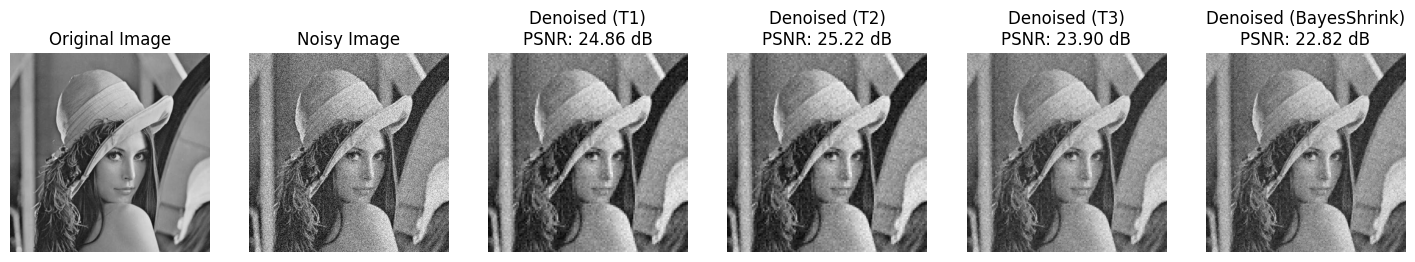

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load Image
image_path = input("Enter the full path of the image: ")
original = img_as_float(io.imread(image_path, as_gray=True))

# Add Gaussian noise (small scale for float images)
noisy = original + np.random.normal(scale=0.15, size=original.shape)
noisy = np.clip(noisy, 0, 1)  # Keep values in [0,1]

# Step 1: Perform Wavelet Decomposition
wavelet = "haar"
levels = 2  # Number of decomposition levels
coeffs = pywt.wavedec2(noisy, wavelet=wavelet, level=levels)

# Step 2: Estimate Noise Standard Deviation
def estimate_sigma(detail_coeffs):
    return np.median(np.abs(detail_coeffs)) / 0.6745

# Use HH coefficients from the finest level (-1, -1) for estimation
sigma_est = estimate_sigma(coeffs[-1][-1])

# Step 3: Compute VisuShrink Thresholds
N = noisy.size
T1 = sigma_est * np.sqrt(2 * np.log(N))
T2 = (sigma_est / 2) * np.sqrt(2 * np.log(N))
T3 = (sigma_est / 4) * np.sqrt(2 * np.log(N))

# Step 4: Compute BayesShrink Threshold
def bayes_shrink_threshold(detail_coeffs, sigma):
    var_coeff = np.var(detail_coeffs)
    return sigma**2 / np.sqrt(var_coeff) if var_coeff > 0 else 0

T_bayes = bayes_shrink_threshold(coeffs[-1][-1], sigma_est)

# Step 5: Apply Soft Thresholding
def soft_threshold(coeffs, threshold):
    return np.sign(coeffs) * np.maximum(np.abs(coeffs) - threshold, 0)

# Function to apply thresholding and reconstruct image
def denoise_image(coeffs, threshold):
    thresholded_coeffs = [coeffs[0]]  # Keep LL (approximation) coefficients unchanged
    for detail_coeff in coeffs[1:]:
        thresholded_coeffs.append(tuple(soft_threshold(c, threshold) for c in detail_coeff))
    return np.clip(pywt.waverec2(thresholded_coeffs, wavelet=wavelet), 0, 1)

# Generate denoised images
denoised_T1 = denoise_image(coeffs, T1)
denoised_T2 = denoise_image(coeffs, T2)
denoised_T3 = denoise_image(coeffs, T3)
denoised_bayes = denoise_image(coeffs, T_bayes)

# Compute PSNR values
psnr_noisy = psnr(original, noisy)
psnr_T1 = psnr(original, denoised_T1)
psnr_T2 = psnr(original, denoised_T2)
psnr_T3 = psnr(original, denoised_T3)
psnr_bayes = psnr(original, denoised_bayes)

print(f"PSNR of Noisy Image: {psnr_noisy:.2f} dB")
print(f"PSNR of Denoised Image (T1): {psnr_T1:.2f} dB")
print(f"PSNR of Denoised Image (T2): {psnr_T2:.2f} dB")
print(f"PSNR of Denoised Image (T3): {psnr_T3:.2f} dB")
print(f"PSNR of Denoised Image (BayesShrink): {psnr_bayes:.2f} dB")

# Plot Results
plt.figure(figsize=(18, 6))
plt.subplot(1, 6, 1)
plt.title("Original Image")
plt.imshow(original, cmap="gray")
plt.axis("off")

plt.subplot(1, 6, 2)
plt.title("Noisy Image")
plt.imshow(noisy, cmap="gray")
plt.axis("off")

plt.subplot(1, 6, 3)
plt.title(f"Denoised (T1)\nPSNR: {psnr_T1:.2f} dB")
plt.imshow(denoised_T1, cmap="gray")
plt.axis("off")

plt.subplot(1, 6, 4)
plt.title(f"Denoised (T2)\nPSNR: {psnr_T2:.2f} dB")
plt.imshow(denoised_T2, cmap="gray")
plt.axis("off")

plt.subplot(1, 6, 5)
plt.title(f"Denoised (T3)\nPSNR: {psnr_T3:.2f} dB")
plt.imshow(denoised_T3, cmap="gray")
plt.axis("off")

plt.subplot(1, 6, 6)
plt.title(f"Denoised (BayesShrink)\nPSNR: {psnr_bayes:.2f} dB")
plt.imshow(denoised_bayes, cmap="gray")
plt.axis("off")

plt.show()


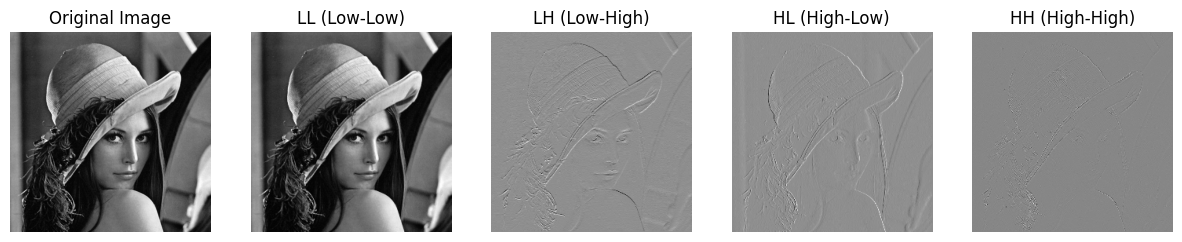

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load the image (grayscale)
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Perform 1-level 2D Discrete Wavelet Transform
coeffs2 = pywt.dwt2(image, 'haar')  # Using Haar wavelet
LL, (LH, HL, HH) = coeffs2  # Extract sub-bands

# Display results
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")

axes[1].imshow(LL, cmap='gray')
axes[1].set_title("LL (Low-Low)")

axes[2].imshow(LH, cmap='gray')
axes[2].set_title("LH (Low-High)")

axes[3].imshow(HL, cmap='gray')
axes[3].set_title("HL (High-Low)")

axes[4].imshow(HH, cmap='gray')
axes[4].set_title("HH (High-High)")

for ax in axes:
    ax.axis("off")

plt.show()


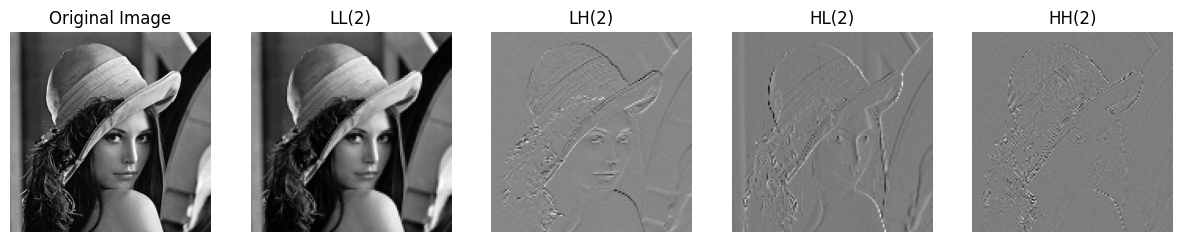

In [ ]:
# Perform 2-level wavelet decomposition
coeffs = pywt.wavedec2(image, 'haar', level=2)

# Extract LL, and first and second level details
LL2, (LH2, HL2, HH2), (LH1, HL1, HH1) = coeffs

# Display the second level decomposition
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")

axes[1].imshow(LL2, cmap='gray')
axes[1].set_title("LL(2)")

axes[2].imshow(LH2, cmap='gray')
axes[2].set_title("LH(2)")

axes[3].imshow(HL2, cmap='gray')
axes[3].set_title("HL(2)")

axes[4].imshow(HH2, cmap='gray')
axes[4].set_title("HH(2)")

for ax in axes:
    ax.axis("off")

plt.show()


VisuShrink and BayesShrink for coloured images

Enter the full path of the image: /content/story_lena_lenna_1.jpg
Estimated Gaussian noise standard deviation = 0.11341395335953902


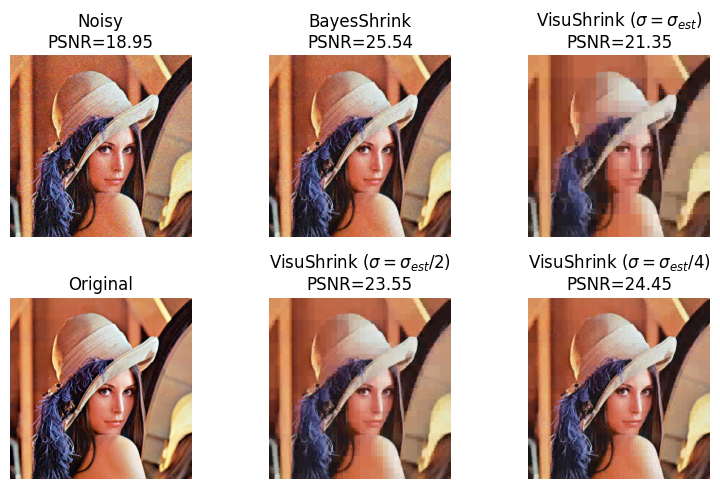

In [ ]:
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

# Input image path
image_path = input("Enter the full path of the image: ")
original = img_as_float(io.imread(image_path))

# Add noise
sigma = 0.12
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5), sharex=True, sharey=True)
plt.gray()

# Estimate noise standard deviation
sigma_est = estimate_sigma(noisy, channel_axis=-1, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

# Apply wavelet denoising
im_bayes = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True, method='BayesShrink', mode='soft', rescale_sigma=True)
im_visushrink = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True, method='VisuShrink', mode='soft', sigma=sigma_est, rescale_sigma=True)
im_visushrink2 = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True, method='VisuShrink', mode='soft', sigma=sigma_est / 2, rescale_sigma=True)
im_visushrink4 = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True, method='VisuShrink', mode='soft', sigma=sigma_est / 4, rescale_sigma=True)

# Compute PSNR
psnr_noisy = peak_signal_noise_ratio(original, noisy)
psnr_bayes = peak_signal_noise_ratio(original, im_bayes)
psnr_visushrink = peak_signal_noise_ratio(original, im_visushrink)
psnr_visushrink2 = peak_signal_noise_ratio(original, im_visushrink2)
psnr_visushrink4 = peak_signal_noise_ratio(original, im_visushrink4)

# Display results
ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title(f'Noisy\nPSNR={psnr_noisy:0.4g}')
ax[0, 1].imshow(im_bayes)
ax[0, 1].axis('off')
ax[0, 1].set_title(f'BayesShrink\nPSNR={psnr_bayes:0.4g}')
ax[0, 2].imshow(im_visushrink)
ax[0, 2].axis('off')
ax[0, 2].set_title(f'VisuShrink ($\sigma=\sigma_{{est}}$)\nPSNR={psnr_visushrink:0.4g}')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(f'VisuShrink ($\sigma=\sigma_{{est}}/2$)\nPSNR={psnr_visushrink2:0.4g}')
ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(f'VisuShrink ($\sigma=\sigma_{{est}}/4$)\nPSNR={psnr_visushrink4:0.4g}')

fig.tight_layout()
plt.show()


Hard v/s Soft Thresholding using BayesShrink

Enter the full path of the image: lena.png
Estimated Gaussian noise standard deviation = 0.1859971306458584


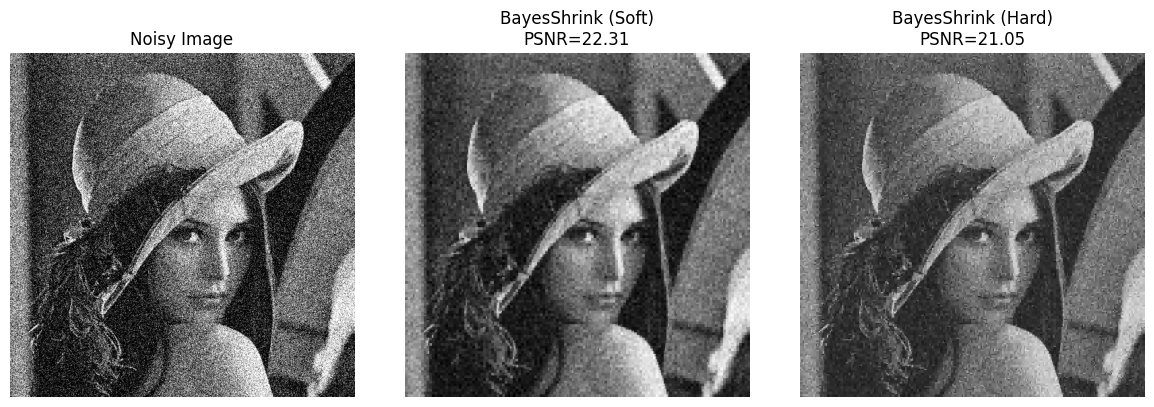

In [ ]:
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import numpy as np

image_path = input("Enter the full path of the image: ")
original = img_as_float(io.imread(image_path, as_gray=True))  # Ensure grayscale

# Add Gaussian noise
sigma = 0.22
noisy = random_noise(original, var=sigma**2)

# Estimate noise standard deviation
sigma_est = estimate_sigma(noisy, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

# Apply wavelet denoising using BayesShrink (Soft & Hard Thresholding)
im_bayess = denoise_wavelet(noisy, wavelet_levels=2, wavelet="haar",
                            method='BayesShrink', mode='soft', rescale_sigma=True)

im_bayesh = denoise_wavelet(noisy, wavelet_levels=2, wavelet="haar",
                            method='BayesShrink', mode='hard', rescale_sigma=True)

# Compute PSNR
psnr_bayess = peak_signal_noise_ratio(original, im_bayess)
psnr_bayesh = peak_signal_noise_ratio(original, im_bayesh)

# Plot results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
plt.gray()

ax[0].imshow(noisy, cmap='gray')
ax[0].axis('off')
ax[0].set_title(f'Noisy Image')

ax[1].imshow(im_bayess, cmap='gray')
ax[1].axis('off')
ax[1].set_title(f'BayesShrink (Soft)\nPSNR={psnr_bayess:.4g}')

ax[2].imshow(im_bayesh, cmap='gray')
ax[2].axis('off')
ax[2].set_title(f'BayesShrink (Hard)\nPSNR={psnr_bayesh:.4g}')

fig.tight_layout()
plt.show()


Enter the full path of the image: lena.png
Estimated Gaussian noise standard deviation = 0.18428980537917866


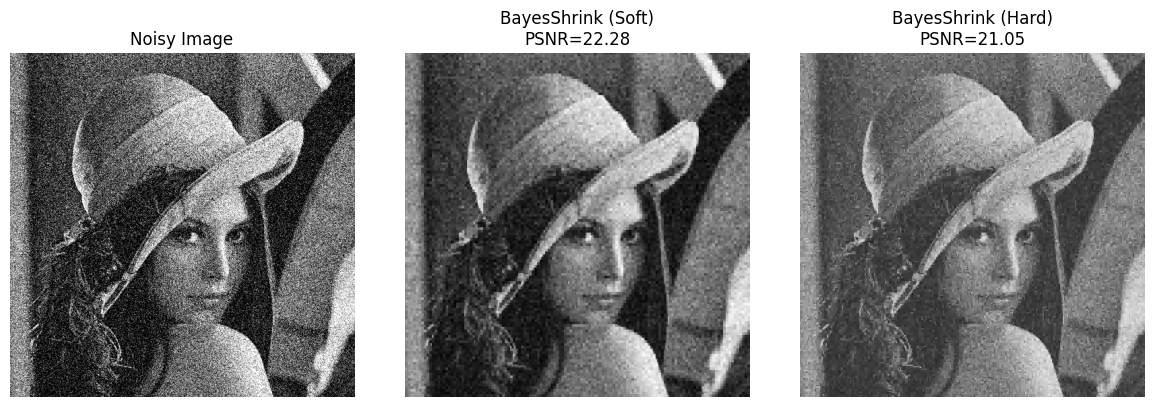

In [ ]:
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import numpy as np

image_path = input("Enter the full path of the image: ")
original = img_as_float(io.imread(image_path, as_gray=True))  # Ensure grayscale

# Add Gaussian noise
sigma = 0.22
noisy = random_noise(original, var=sigma**2)

# Estimate noise standard deviation
sigma_est = estimate_sigma(noisy, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

# Apply wavelet denoising using BayesShrink (Soft & Hard Thresholding)
im_bayess = denoise_wavelet(noisy, wavelet_levels=2, wavelet="haar",
                            method='BayesShrink', mode='soft', rescale_sigma=True)

im_bayesh = denoise_wavelet(noisy, wavelet_levels=2, wavelet="haar",
                            method='BayesShrink', mode='hard', rescale_sigma=True)

# Compute PSNR
psnr_noisy = peak_signal_noise_ratio(original, noisy)
psnr_bayess = peak_signal_noise_ratio(original, im_bayess)
psnr_bayesh = peak_signal_noise_ratio(original, im_bayesh)

# Plot results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
plt.gray()

ax[0].imshow(noisy, cmap='gray')
ax[0].axis('off')
ax[0].set_title(f'Noisy Image')

ax[1].imshow(im_bayess, cmap='gray')
ax[1].axis('off')
ax[1].set_title(f'BayesShrink (Soft)\nPSNR={psnr_bayess:.4g}')

ax[2].imshow(im_bayesh, cmap='gray')
ax[2].axis('off')
ax[2].set_title(f'BayesShrink (Hard)\nPSNR={psnr_bayesh:.4g}')

fig.tight_layout()
plt.show()

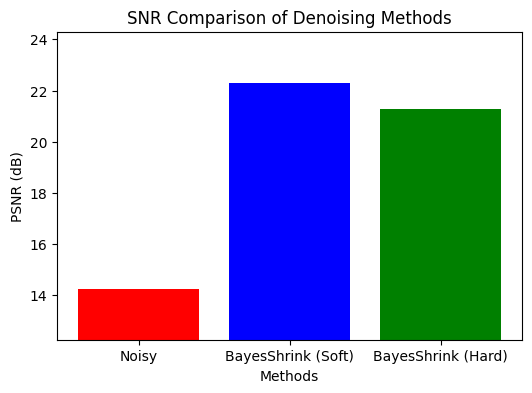

In [ ]:
# Bar plot for SNR comparison
methods = ['Noisy', 'BayesShrink (Soft)', 'BayesShrink (Hard)']
snr_values = [psnr_noisy, psnr_bayess, psnr_bayesh]

plt.figure(figsize=(6, 4))
plt.bar(methods, snr_values, color=['red', 'blue', 'green'])
plt.xlabel("Methods")
plt.ylabel("PSNR (dB)")
plt.title("SNR Comparison of Denoising Methods")
plt.ylim(min(snr_values) - 2, max(snr_values) + 2)
plt.show()

Enter the full path of the image: /content/story_lena_lenna_1.jpg
Estimated Gaussian noise standard deviation = 0.19238120992146615


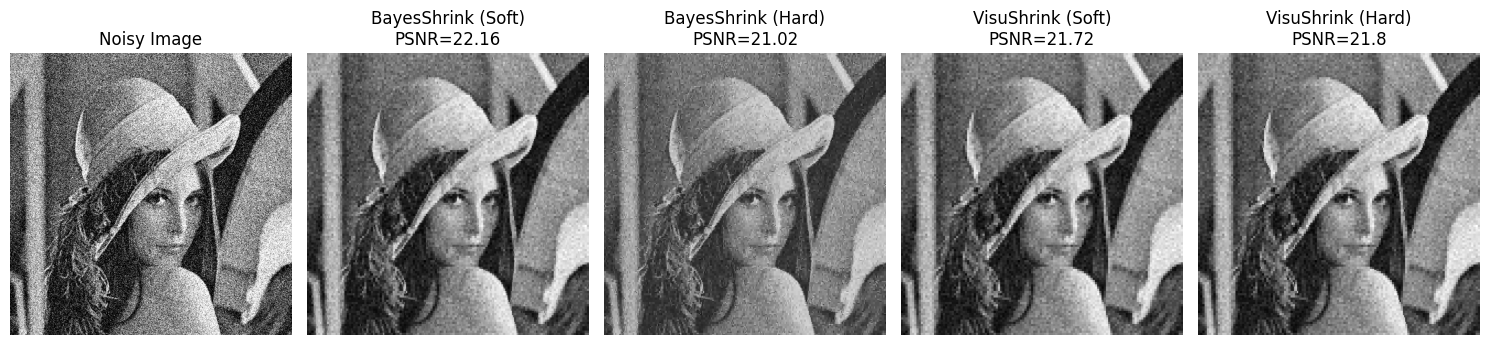

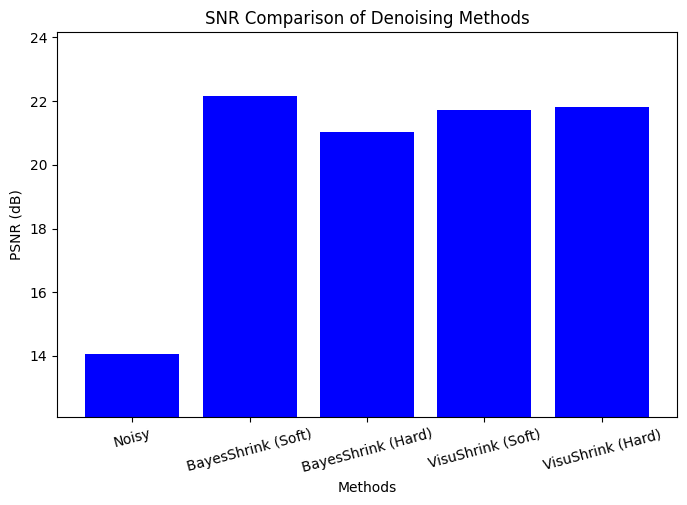

In [ ]:
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import numpy as np

# Load image
image_path = input("Enter the full path of the image: ")
original = img_as_float(io.imread(image_path, as_gray=True))  # Ensure grayscale

# Add Gaussian noise
sigma = 0.22
noisy = random_noise(original, var=sigma**2)

# Estimate noise standard deviation
sigma_est = estimate_sigma(noisy, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

# Apply wavelet denoising using BayesShrink (Soft & Hard)
im_bayess = denoise_wavelet(noisy, wavelet_levels=2, wavelet="haar",
                            method='BayesShrink', mode='soft', rescale_sigma=True)

im_bayesh = denoise_wavelet(noisy, wavelet_levels=2, wavelet="haar",
                            method='BayesShrink', mode='hard', rescale_sigma=True)

# Apply wavelet denoising using VisuShrink (Soft & Hard)
im_visus = denoise_wavelet(noisy, wavelet_levels=2, wavelet="haar",
                           method='VisuShrink', mode='soft', rescale_sigma=True)

im_visuh = denoise_wavelet(noisy, wavelet_levels=2, wavelet="haar",
                           method='VisuShrink', mode='hard', rescale_sigma=True)

# Compute PSNR
psnr_noisy = peak_signal_noise_ratio(original, noisy)
psnr_bayess = peak_signal_noise_ratio(original, im_bayess)
psnr_bayesh = peak_signal_noise_ratio(original, im_bayesh)
psnr_visus = peak_signal_noise_ratio(original, im_visus)
psnr_visuh = peak_signal_noise_ratio(original, im_visuh)

# Plot results
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 4), sharex=True, sharey=True)
plt.gray()

ax[0].imshow(noisy, cmap='gray')
ax[0].axis('off')
ax[0].set_title(f'Noisy Image')

ax[1].imshow(im_bayess, cmap='gray')
ax[1].axis('off')
ax[1].set_title(f'BayesShrink (Soft)\nPSNR={psnr_bayess:.4g}')

ax[2].imshow(im_bayesh, cmap='gray')
ax[2].axis('off')
ax[2].set_title(f'BayesShrink (Hard)\nPSNR={psnr_bayesh:.4g}')

ax[3].imshow(im_visus, cmap='gray')
ax[3].axis('off')
ax[3].set_title(f'VisuShrink (Soft)\nPSNR={psnr_visus:.4g}')

ax[4].imshow(im_visuh, cmap='gray')
ax[4].axis('off')
ax[4].set_title(f'VisuShrink (Hard)\nPSNR={psnr_visuh:.4g}')

fig.tight_layout()
plt.show()

# Bar plot for PSNR comparison
methods = ['Noisy', 'BayesShrink (Soft)', 'BayesShrink (Hard)', 'VisuShrink (Soft)', 'VisuShrink (Hard)']
snr_values = [psnr_noisy, psnr_bayess, psnr_bayesh, psnr_visus, psnr_visuh]

plt.figure(figsize=(8, 5))
plt.bar(methods, snr_values, color=['blue', 'blue', 'blue', 'blue', 'blue'])
plt.xlabel("Methods")
plt.ylabel("PSNR (dB)")
plt.title("SNR Comparison of Denoising Methods")
plt.ylim(min(snr_values) - 2, max(snr_values) + 2)
plt.xticks(rotation=15)
plt.show()


Enter the full path of the image: /content/story_lena_lenna_1.jpg
Estimated Gaussian noise standard deviation = 0.11291803468287076


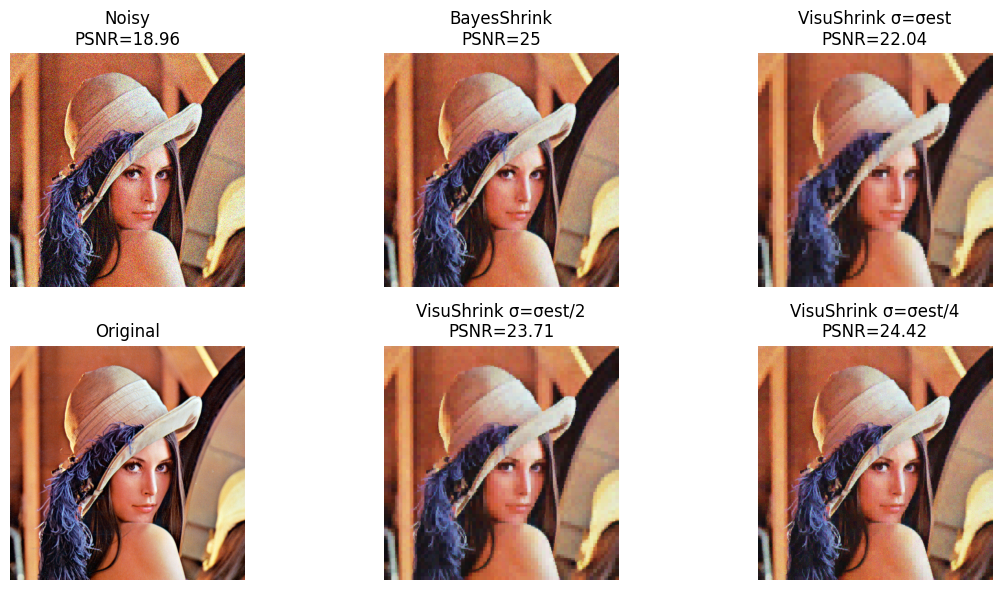

In [ ]:
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import numpy as np

# Load color image
image_path = input("Enter the full path of the image: ")
original = img_as_float(io.imread(image_path))  # Remove as_gray=True to keep color

# Add Gaussian noise
sigma = 0.12
noisy = random_noise(original, var=sigma**2)

# Estimate noise standard deviation for color
sigma_est = estimate_sigma(noisy, channel_axis=-1, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

# Apply BayesShrink
im_bayes = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='BayesShrink',
    mode='soft',
    rescale_sigma=True,
    channel_axis=-1
)

# Apply VisuShrink with different sigma values
im_visushrink = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est,
    rescale_sigma=True,
    channel_axis=-1
)

im_visushrink2 = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est / 2,
    rescale_sigma=True,
    channel_axis=-1
)

im_visushrink4 = denoise_wavelet(
    noisy, wavelet_levels=3, wavelet="haar",
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est / 4,
    rescale_sigma=True,
    channel_axis=-1
)

# Compute PSNR
psnr_noisy = peak_signal_noise_ratio(original, noisy, data_range=1)
psnr_bayes = peak_signal_noise_ratio(original, im_bayes, data_range=1)
psnr_visushrink = peak_signal_noise_ratio(original, im_visushrink, data_range=1)
psnr_visushrink2 = peak_signal_noise_ratio(original, im_visushrink2, data_range=1)
psnr_visushrink4 = peak_signal_noise_ratio(original, im_visushrink4, data_range=1)

# Plot results
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
titles = [
    f'Noisy\nPSNR={psnr_noisy:.4g}',
    f'BayesShrink\nPSNR={psnr_bayes:.4g}',
    f'VisuShrink σ=σest\nPSNR={psnr_visushrink:.4g}',
    'Original',
    f'VisuShrink σ=σest/2\nPSNR={psnr_visushrink2:.4g}',
    f'VisuShrink σ=σest/4\nPSNR={psnr_visushrink4:.4g}'
]
images = [noisy, im_bayes, im_visushrink, original, im_visushrink2, im_visushrink4]

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(images[i])
    ax_i.set_title(titles[i])
    ax_i.axis('off')

plt.tight_layout()
plt.show()
